In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
artists_info = pd.DataFrame(pd.read_csv('artists_info.csv'))

In [3]:
artists_info.head()

,name,years,genre,nationality
0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian
1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian
2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican
3,Claude Monet,1840 - 1926,Impressionism,French
4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian


In [4]:
artists_info['genre'] = [g.split(',') for g in artists_info['genre']]

In [5]:
artists_info.describe()

,name,years,genre,nationality
count,50,50,50,50
unique,50,50,31,17
top,Amedeo Modigliani,1884 - 1920,[Impressionism],French
freq,1,1,4,13


In [6]:
genre_key = []
for g in artists_info['genre']:
    for gg in g:
        genre_key.append(gg)
genre_key = set(genre_key)
print(genre_key, ' total is ', len(genre_key))

{'Impressionism', 'Abstract Expressionism', 'Abstractionism', 'Surrealism', 'Primitivism', 'Suprematism', 'Social Realism', 'Byzantine Art', 'Northern Renaissance', 'Symbolism', 'Cubism', 'Muralism', 'Baroque', 'Art Nouveau', 'Pop Art', 'Expressionism', 'Realism', 'Mannerism', 'Proto Renaissance', 'Early Renaissance', 'Romanticism', 'Post-Impressionism', 'High Renaissance', 'Neoplasticism'}  total is  24


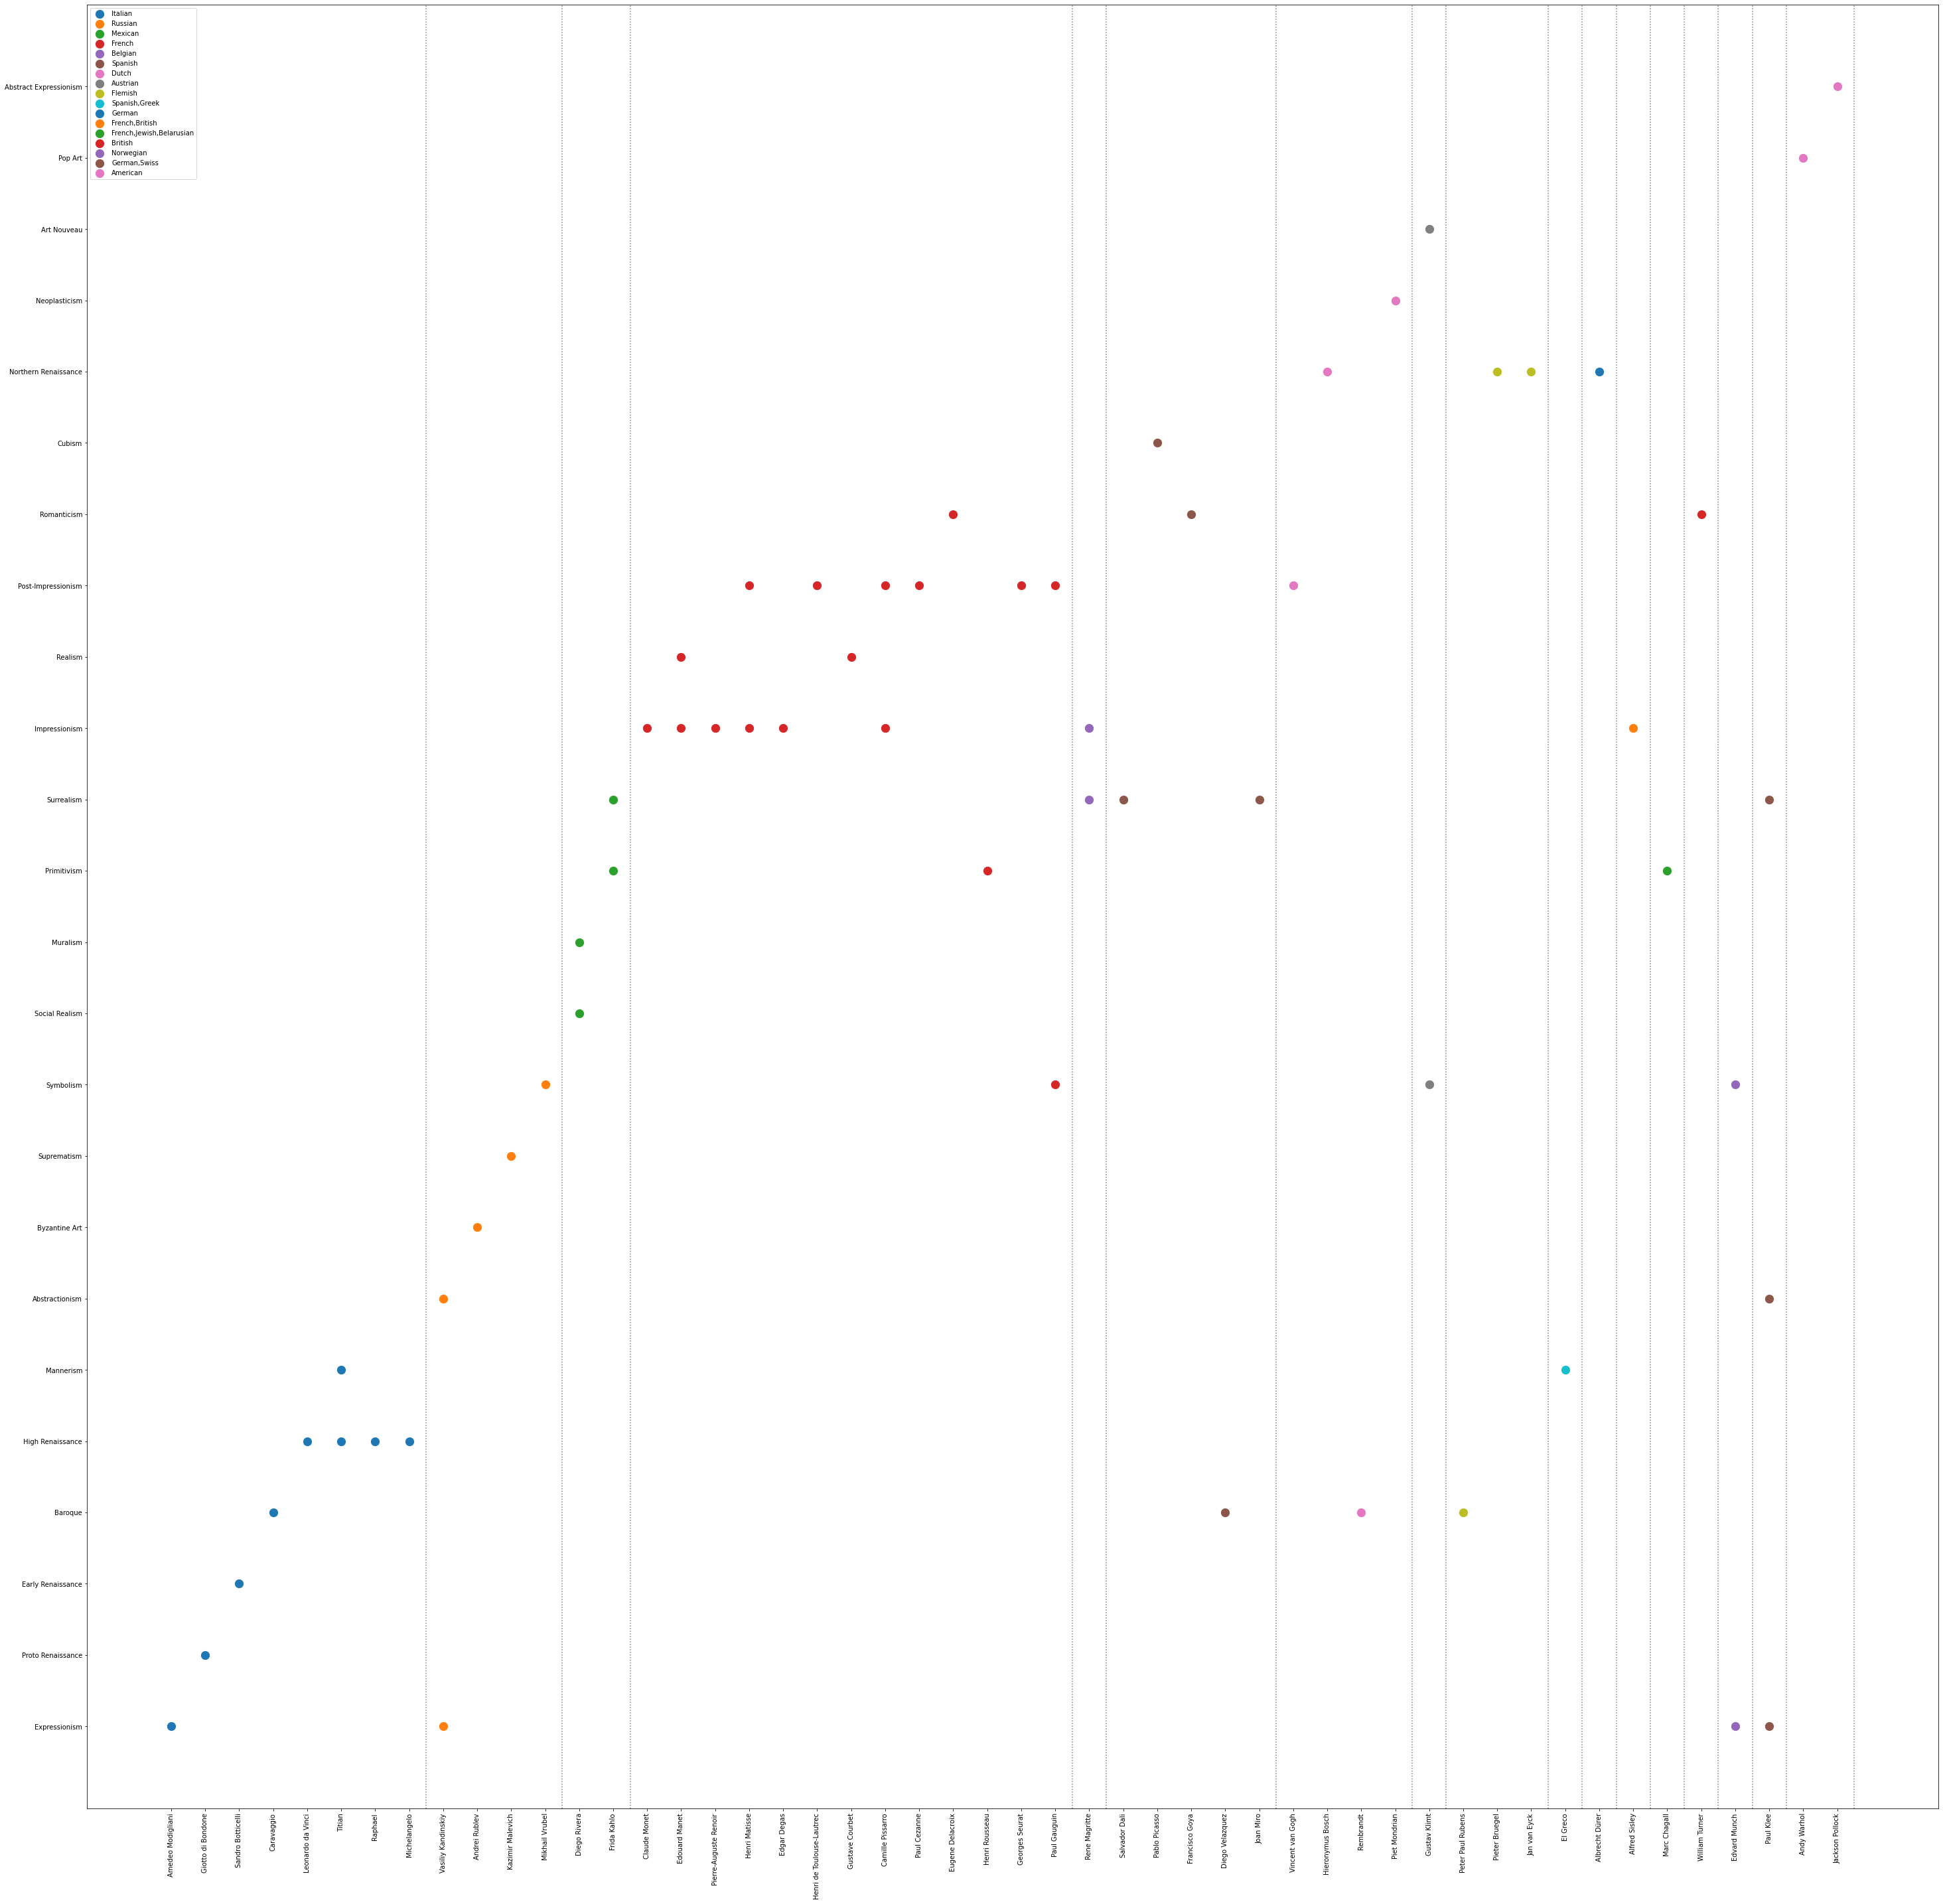

In [96]:
from cProfile import label


fig = plt.figure(figsize=(50, 50))
ax = fig.add_subplot(111)
nationality_key = artists_info['nationality'].unique()
vl_pos = 0
for nationality in nationality_key:
    artists_info_sub = artists_info[artists_info['nationality']==nationality]
    vl_pos += artists_info_sub['name'].count()
    ax.axvline(vl_pos - 0.5, color='gray', linestyle=':')
    names = [row[1]['name'] for row in artists_info_sub.iterrows() for _ in range(len(row[1]['genre']))]
    genres = [g for row in artists_info_sub.iterrows() for g in row[1]['genre']]
    ax.scatter(x=names,
               y=genres, s = 150, label=nationality), 
plt.xticks(rotation=90)
ax.legend()    
plt.show()